## Bank marketing prediction project (test dataset) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
bank = pd.read_csv("C:/Users/user/Downloads/termdeposit_test.csv")
bank

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [3]:
bank.shape

(13564, 17)

In [4]:
bank.head(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
5,16013,32,management,single,tertiary,no,0,yes,no,cellular,22,jul,455,2,-1,0,unknown
6,196,33,blue-collar,single,secondary,no,307,yes,no,unknown,5,may,309,2,-1,0,unknown
7,8516,37,management,married,secondary,no,341,no,no,unknown,3,jun,120,2,-1,0,unknown
8,31208,36,technician,divorced,tertiary,no,1381,no,no,cellular,2,mar,149,1,-1,0,unknown
9,38462,50,admin.,single,primary,no,181,yes,no,cellular,15,may,119,4,372,3,failure


In [5]:
bank.tail(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13549,8494,32,services,married,secondary,no,1464,yes,no,unknown,3,jun,193,1,-1,0,unknown
13550,1901,35,management,single,tertiary,no,-202,yes,no,unknown,9,may,1461,2,-1,0,unknown
13551,35493,56,technician,married,secondary,no,264,yes,yes,cellular,7,may,639,2,280,5,success
13552,15162,45,technician,married,secondary,no,1081,yes,no,cellular,17,jul,127,3,-1,0,unknown
13553,20780,50,self-employed,married,secondary,no,36,no,no,cellular,13,aug,104,10,-1,0,unknown
13554,11568,51,unemployed,married,secondary,no,-267,no,yes,unknown,19,jun,208,2,-1,0,unknown
13555,23487,34,management,single,tertiary,no,1070,no,no,cellular,28,aug,91,15,-1,0,unknown
13556,27122,46,self-employed,married,primary,no,3155,yes,no,cellular,21,nov,271,1,-1,0,unknown
13557,837,30,services,single,secondary,no,-174,yes,no,unknown,7,may,113,1,-1,0,unknown
13558,35237,32,technician,single,secondary,no,129,yes,no,cellular,7,may,213,1,-1,0,unknown


In [6]:
#Checking for null values
bank.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

<Axes: >

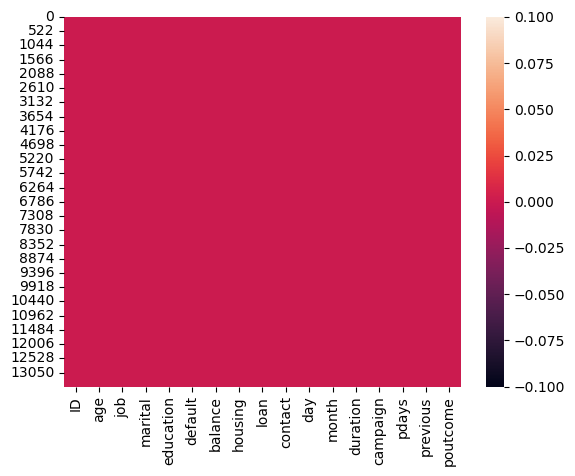

In [7]:
sns.heatmap(bank.isnull())

-- No null values present in the dataset

In [8]:
#Removing unwanted column - i.e ID feature
bank.drop('ID',axis = 1,inplace = True)

In [9]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [10]:
#Checking for Duplicates
bank.duplicated().sum()

0

In [11]:
#Checking for dataset info
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        13564 non-null  int64 
 1   job        13564 non-null  object
 2   marital    13564 non-null  object
 3   education  13564 non-null  object
 4   default    13564 non-null  object
 5   balance    13564 non-null  int64 
 6   housing    13564 non-null  object
 7   loan       13564 non-null  object
 8   contact    13564 non-null  object
 9   day        13564 non-null  int64 
 10  month      13564 non-null  object
 11  duration   13564 non-null  int64 
 12  campaign   13564 non-null  int64 
 13  pdays      13564 non-null  int64 
 14  previous   13564 non-null  int64 
 15  poutcome   13564 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.7+ MB


In [12]:
#Checking the number of unique values of each column
bank.nunique()

age            75
job            12
marital         3
education       4
default         2
balance      4292
housing         2
loan            2
contact         3
day            31
month          12
duration     1201
campaign       40
pdays         422
previous       33
poutcome        4
dtype: int64

In [13]:
#Now we split the data into numerical and categorical columns
cat_col = []
for i in bank.dtypes.index:
    if bank.dtypes[i] == "object":
        cat_col.append(i)
print("Categorical Variables: ",cat_col)

Categorical Variables:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [14]:
num_col = []
for i in bank.dtypes.index:
    if bank.dtypes[i] != "object":
        num_col.append(i)
print("Numerical Variables: ",num_col)

Numerical Variables:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [15]:
#Checking unique variables in categorical columns
for i in cat_col:
    print(f"Categories in {i} variable: ",end=" ")
    print(bank[i].unique())

Categories in job variable:  ['services' 'retired' 'self-employed' 'blue-collar' 'management'
 'technician' 'admin.' 'unemployed' 'housemaid' 'entrepreneur' 'student'
 'unknown']
Categories in marital variable:  ['married' 'divorced' 'single']
Categories in education variable:  ['secondary' 'primary' 'tertiary' 'unknown']
Categories in default variable:  ['no' 'yes']
Categories in housing variable:  ['yes' 'no']
Categories in loan variable:  ['no' 'yes']
Categories in contact variable:  ['cellular' 'telephone' 'unknown']
Categories in month variable:  ['may' 'jul' 'jun' 'mar' 'feb' 'sep' 'aug' 'dec' 'jan' 'apr' 'nov' 'oct']
Categories in poutcome variable:  ['unknown' 'failure' 'other' 'success']


In [16]:
#Univariate Analysis
#Checking statistical info for numerical columns
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


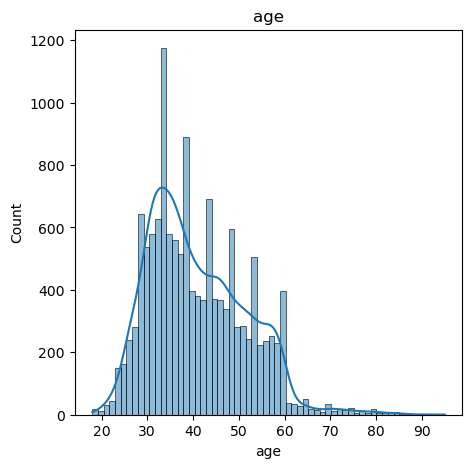

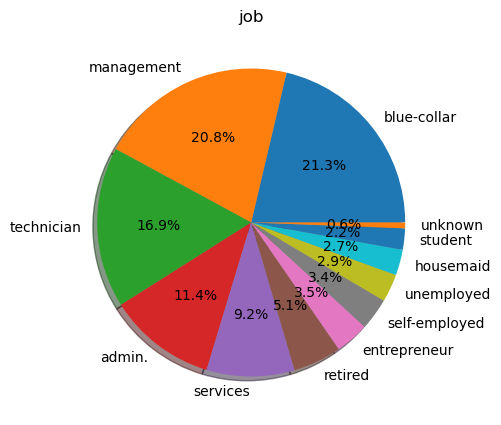

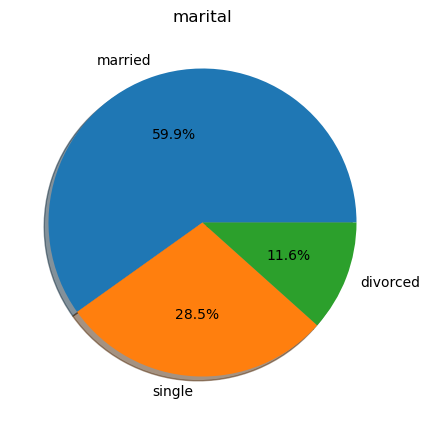

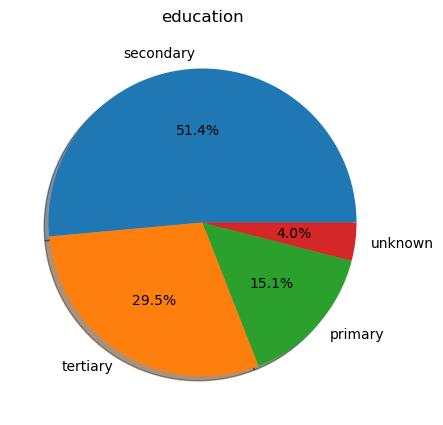

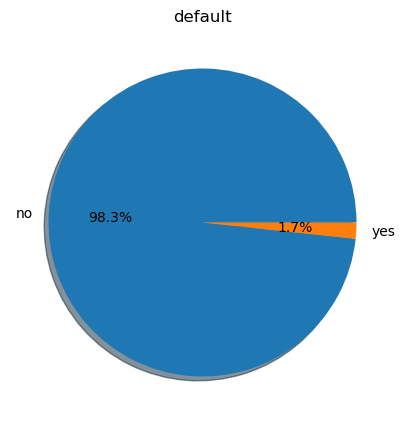

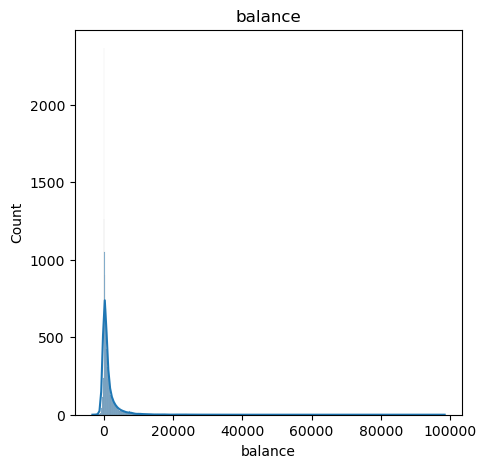

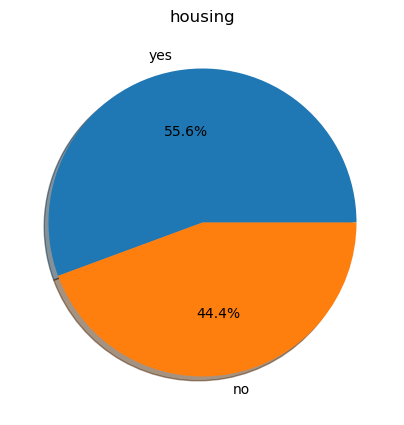

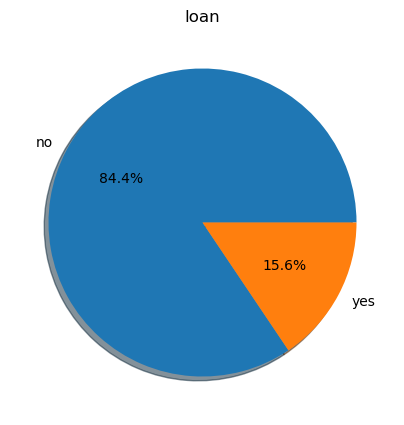

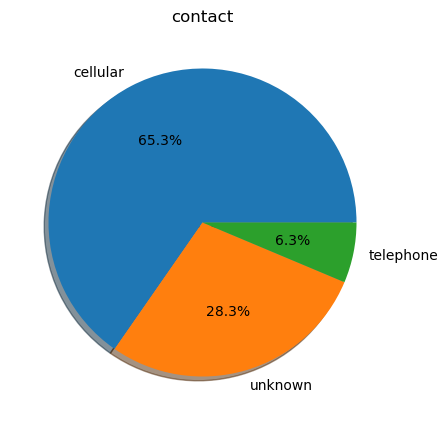

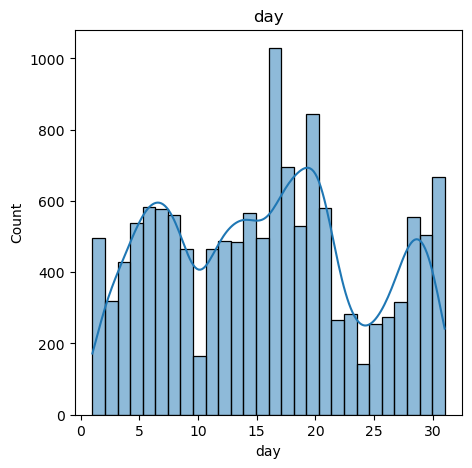

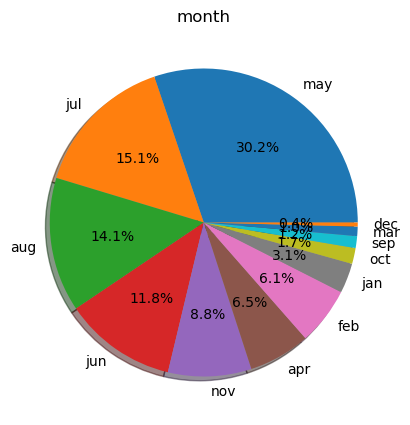

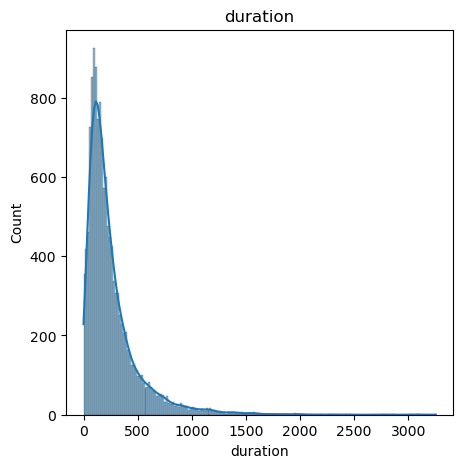

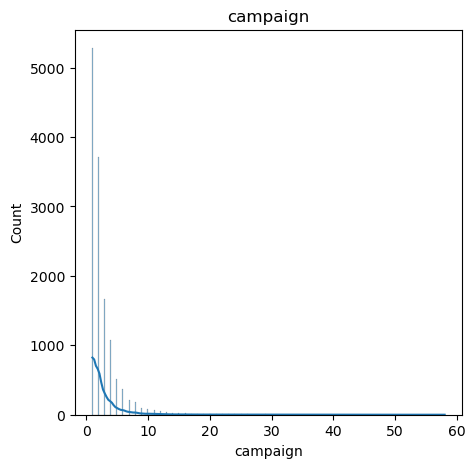

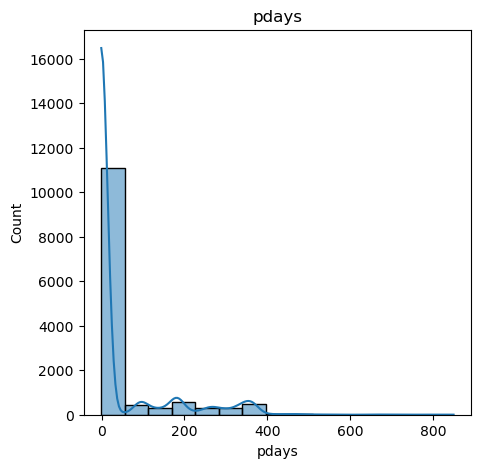

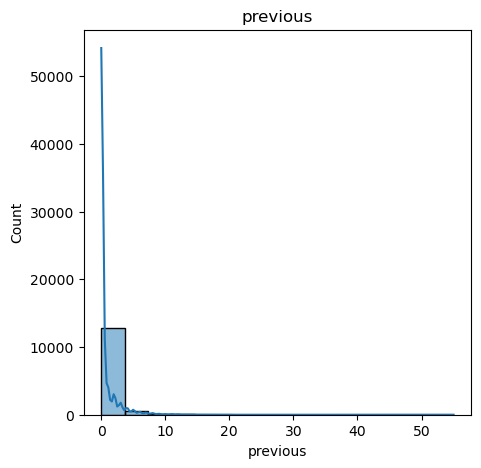

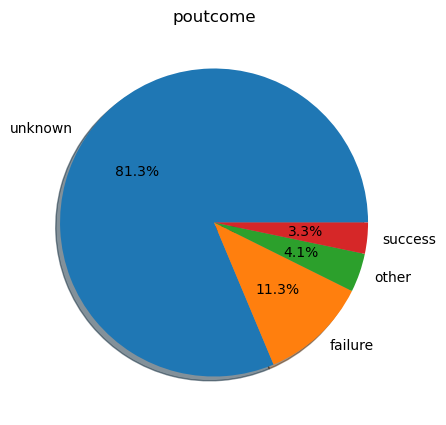

In [17]:
# Analysing each column
for column in bank:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if bank[column].dtypes != "object":
        sns.histplot(x = column,data = bank,kde=True)
    elif bank[column].dtypes == "object":
        sizes = bank[column].value_counts()
        plt.pie(sizes.values,labels=sizes.index,autopct = '%1.1f%%',shadow=True)

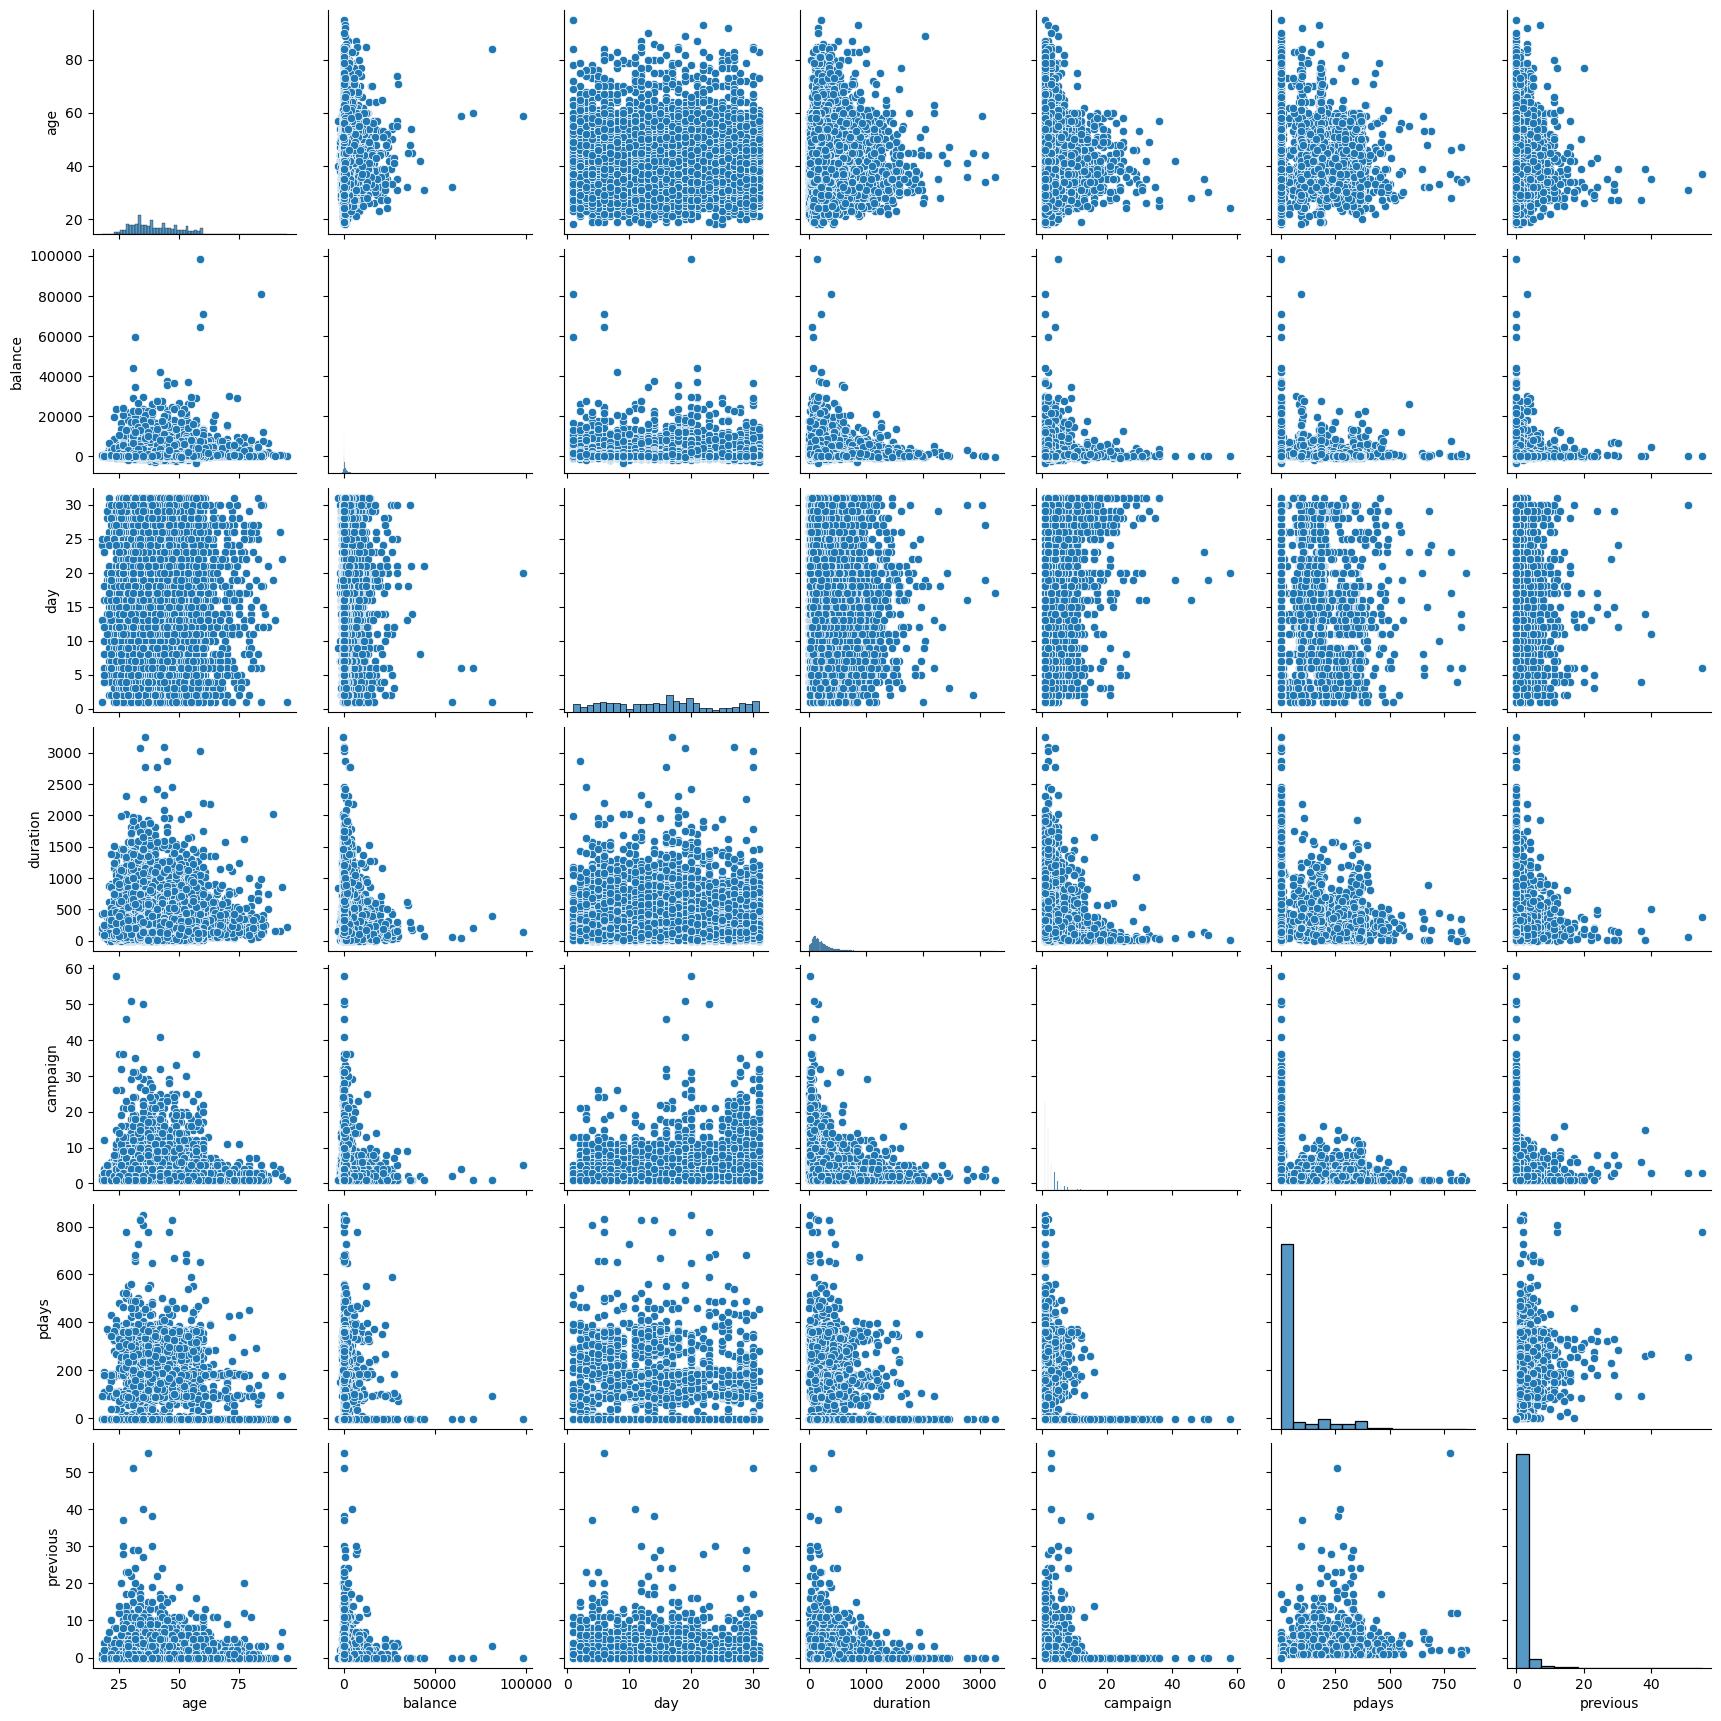

In [18]:
#Multivariate Analysis
sns.pairplot(bank)

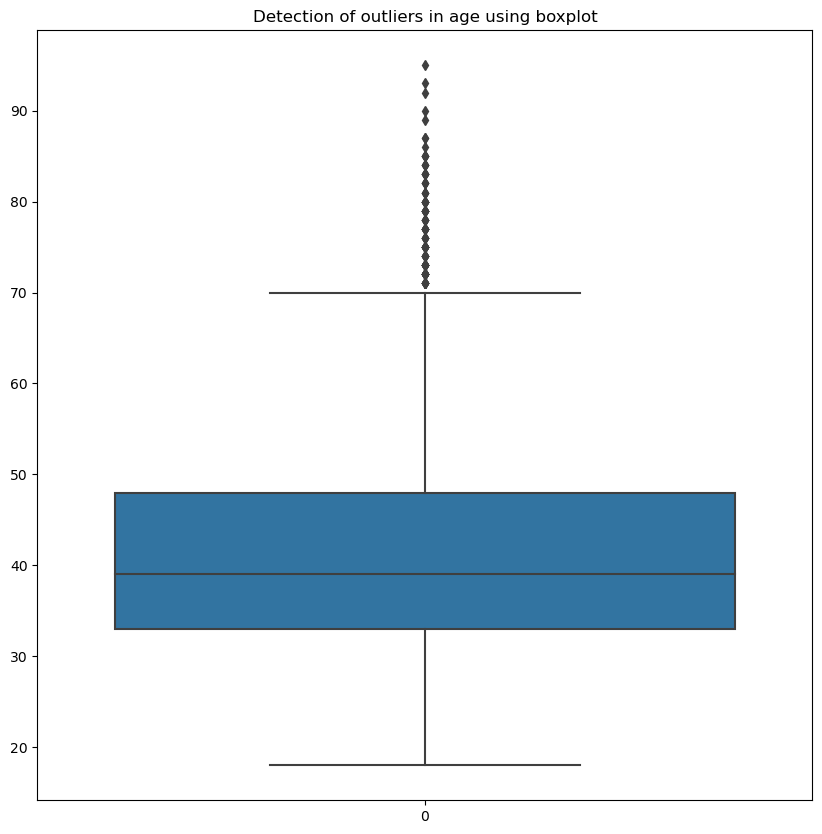

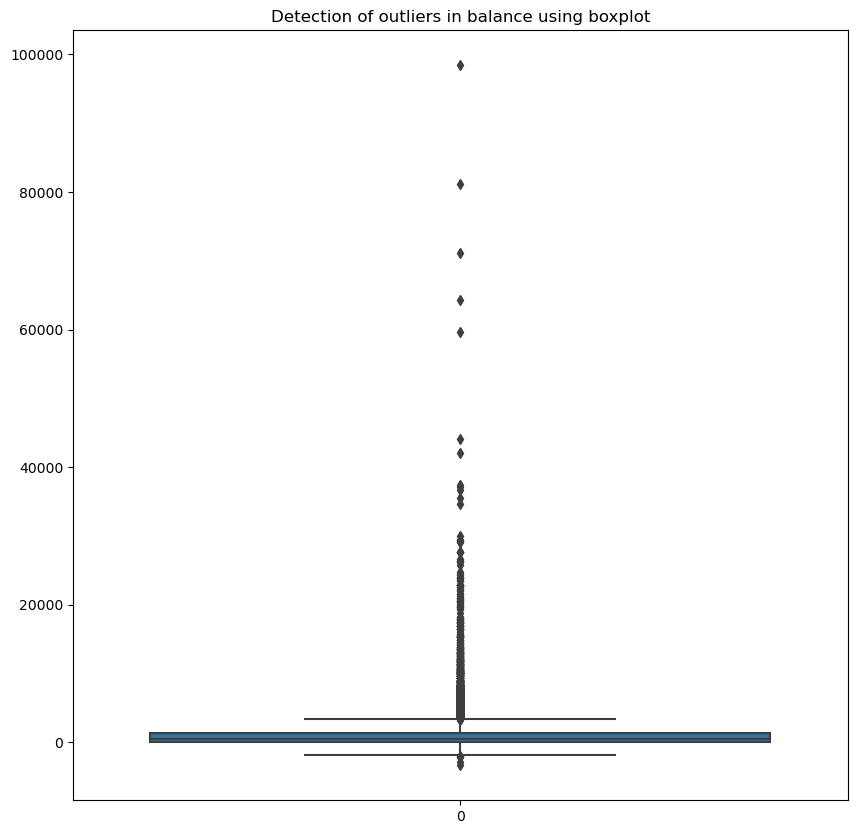

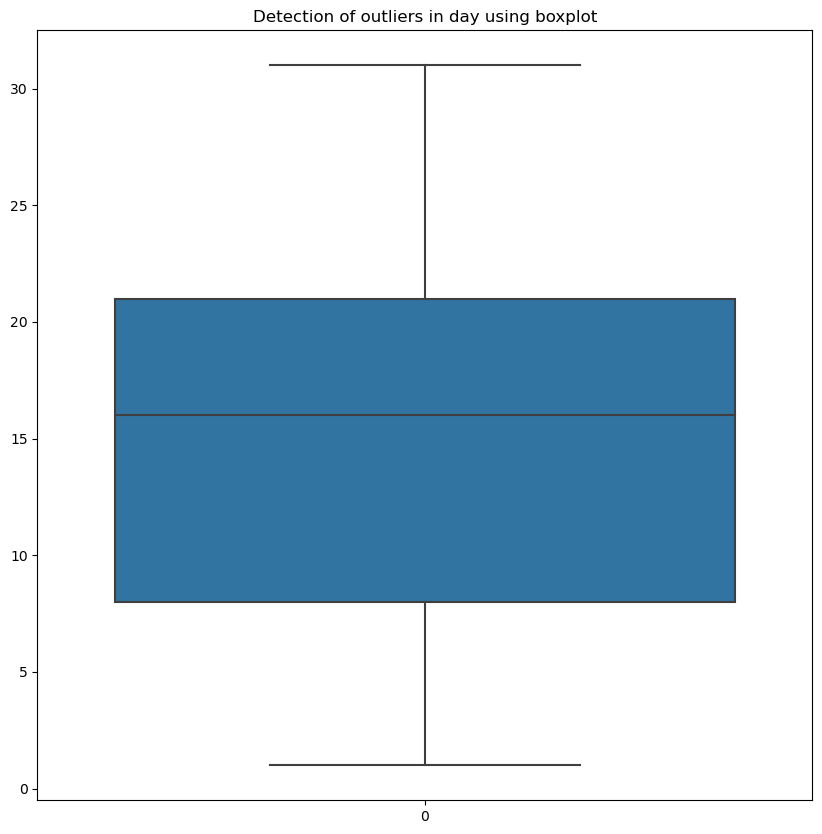

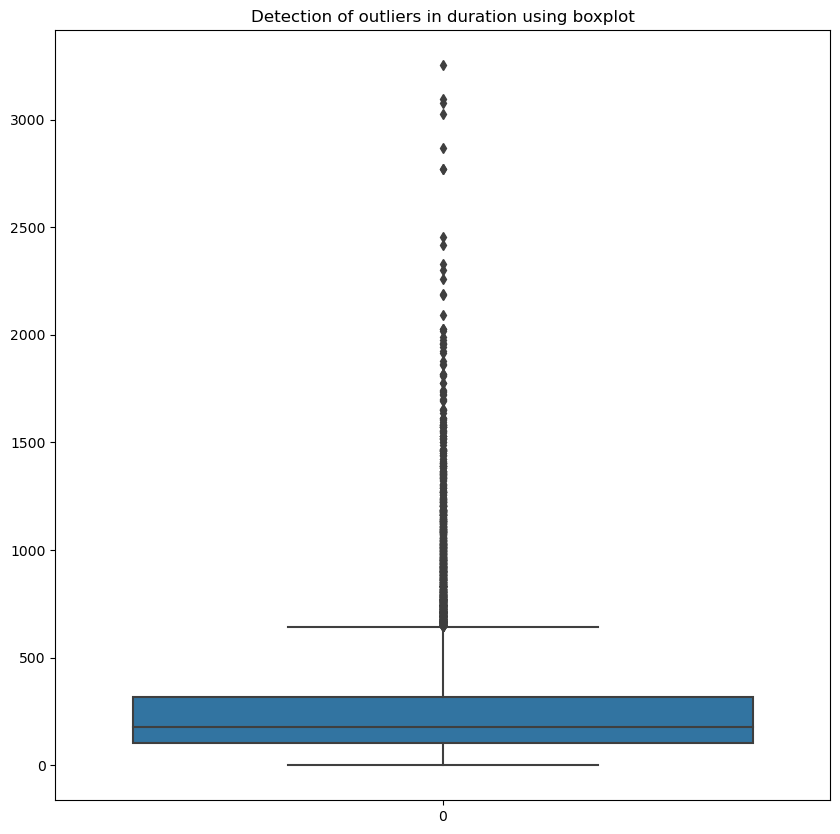

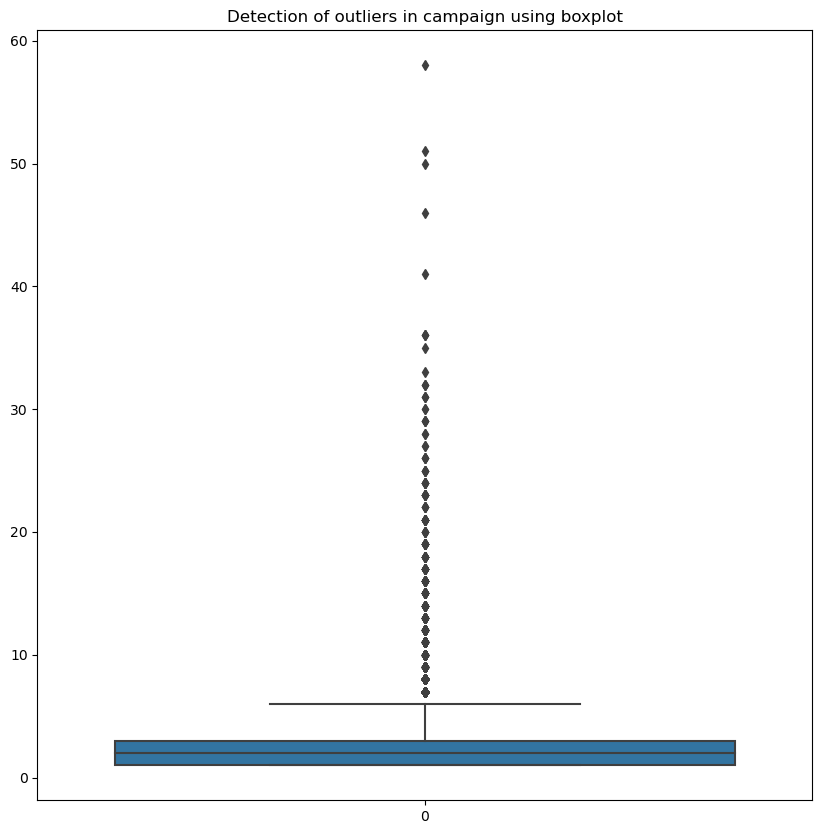

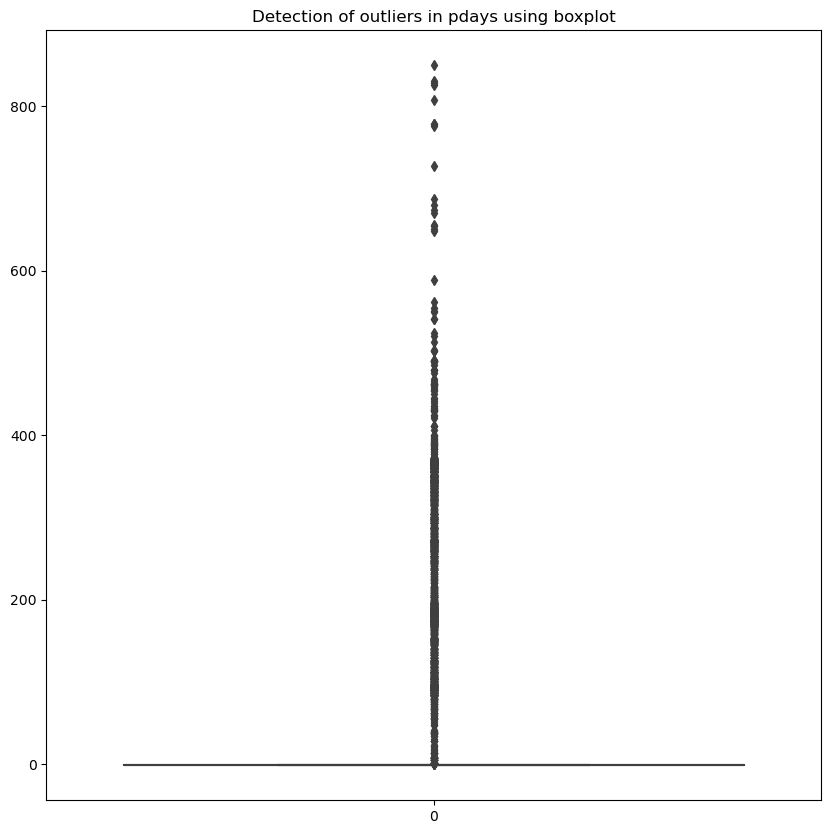

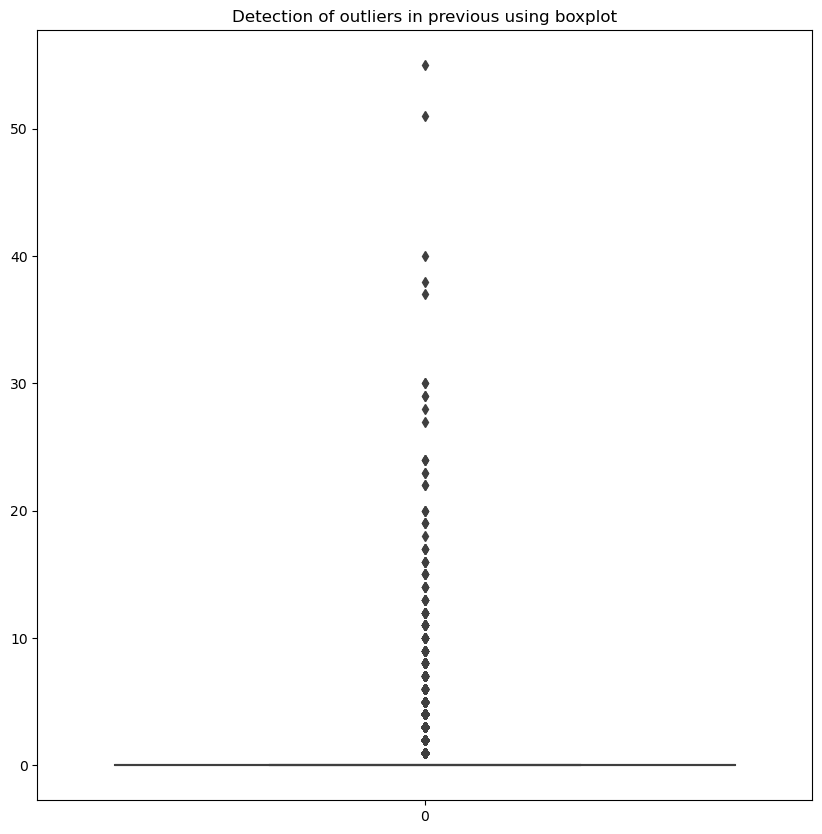

In [19]:
#Feature Engineering and Feature Selection
##Checking for outliers using boxplots and removing them if necessary
numerical_features = [feature for feature in bank.columns if ((bank[feature].dtypes !='O') and (feature not in ['subscribed']))]
numerical_features

categorical_features = [feature for feature in bank.columns if ((bank[feature].dtypes=='O') and (feature not in ['subscribed']))]
categorical_features

for numerical_feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(bank[numerical_feature])
    plt.title('Detection of outliers in {} using boxplot'.format(numerical_feature))
plt.show()

In [20]:
# Removing the 'pdays' feature as it has many outliers
bank.drop(['pdays'],axis=1,inplace=True)

In [22]:
#Removing the 'default' feature
bank.drop(['default'],axis=1,inplace=True)

In [23]:
#Removing outliers from 'campaign' and 'previous' features
from scipy.stats import zscore
z_scores_column1 = zscore(bank['previous'])
z_scores_column2 = zscore(bank['campaign'])
threshold=3
outliers = (abs(z_scores_column1)<threshold) & (abs(z_scores_column2)<threshold)
bank_2 = bank[outliers]

In [24]:
bank_2

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,32,services,married,secondary,118,yes,no,cellular,15,may,20,6,0,unknown
1,78,retired,divorced,primary,2787,no,no,telephone,1,jul,372,1,0,unknown
2,31,self-employed,single,tertiary,144,yes,no,unknown,16,may,676,1,0,unknown
3,57,services,single,primary,3777,yes,no,telephone,13,may,65,2,0,unknown
4,45,blue-collar,divorced,secondary,-705,no,yes,unknown,3,jul,111,1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,45,no,no,cellular,28,aug,148,4,0,unknown
13560,54,blue-collar,married,primary,2281,yes,no,unknown,20,jun,158,1,0,unknown
13561,35,retired,married,primary,285,yes,no,cellular,29,jan,136,1,0,unknown
13562,29,admin.,single,secondary,464,no,no,cellular,9,nov,208,2,3,success


-- Correlation Analysis

In [25]:
#Correlation among numerical columns
bank_cor = bank_2.corr()
bank_cor

,age,balance,day,duration,campaign,previous
age,1.000000,0.085476,-0.004087,-0.011241,0.032190,0.008998
balance,0.085476,1.000000,0.007952,0.013719,-0.011526,0.038876
day,-0.004087,0.007952,1.000000,-0.015109,0.129177,-0.070420
duration,-0.011241,0.013719,-0.015109,1.000000,-0.060420,0.005956
campaign,0.032190,-0.011526,0.129177,-0.060420,1.000000,-0.071112
previous,0.008998,0.038876,-0.070420,0.005956,-0.071112,1.000000


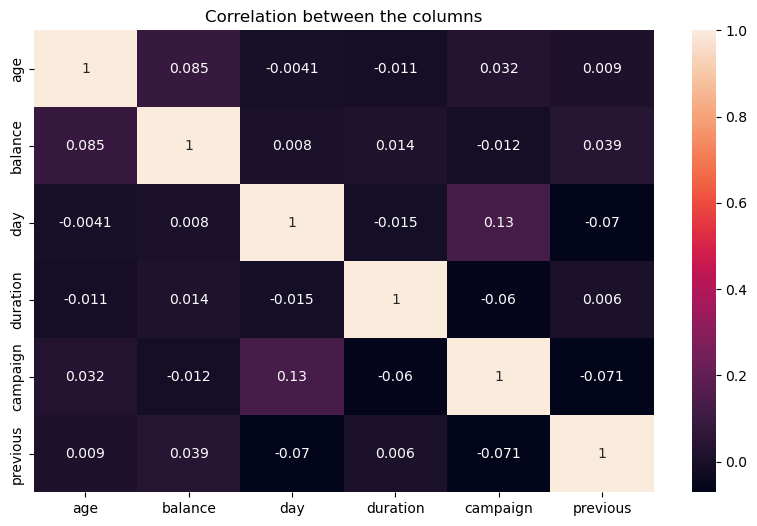

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(bank_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

### Data Preprocessing 

In [27]:
bank_2

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,32,services,married,secondary,118,yes,no,cellular,15,may,20,6,0,unknown
1,78,retired,divorced,primary,2787,no,no,telephone,1,jul,372,1,0,unknown
2,31,self-employed,single,tertiary,144,yes,no,unknown,16,may,676,1,0,unknown
3,57,services,single,primary,3777,yes,no,telephone,13,may,65,2,0,unknown
4,45,blue-collar,divorced,secondary,-705,no,yes,unknown,3,jul,111,1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,45,no,no,cellular,28,aug,148,4,0,unknown
13560,54,blue-collar,married,primary,2281,yes,no,unknown,20,jun,158,1,0,unknown
13561,35,retired,married,primary,285,yes,no,cellular,29,jan,136,1,0,unknown
13562,29,admin.,single,secondary,464,no,no,cellular,9,nov,208,2,3,success


-- Label Encoding

In [29]:
categorical_features = [feature for feature in bank_2.columns if ((bank_2[feature].dtypes=='O') and (feature not in ['subscribed']))]
categorical_features

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [33]:
bool_columns = ['housing','loan']
for i in bool_columns:
    bank_2[i+'_new'] = bank_2[i].apply(lambda x : 1 if x == 'yes' else 0)
    bank_2.drop(i,axis=1,inplace=True)

In [34]:
bank_2

,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,loan_new
0,32,services,married,secondary,118,cellular,15,may,20,6,0,unknown,1,0
1,78,retired,divorced,primary,2787,telephone,1,jul,372,1,0,unknown,0,0
2,31,self-employed,single,tertiary,144,unknown,16,may,676,1,0,unknown,1,0
3,57,services,single,primary,3777,telephone,13,may,65,2,0,unknown,1,0
4,45,blue-collar,divorced,secondary,-705,unknown,3,jul,111,1,0,unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,45,cellular,28,aug,148,4,0,unknown,0,0
13560,54,blue-collar,married,primary,2281,unknown,20,jun,158,1,0,unknown,1,0
13561,35,retired,married,primary,285,cellular,29,jan,136,1,0,unknown,1,0
13562,29,admin.,single,secondary,464,cellular,9,nov,208,2,3,success,0,0


In [35]:
cat_col = ['job','marital','education','contact','month','poutcome']
bank_3 = pd.get_dummies(bank_2,columns=cat_col)
bank_3

,age,balance,day,duration,campaign,previous,housing_new,loan_new,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,32,118,15,20,6,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,78,2787,1,372,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,31,144,16,676,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,57,3777,13,65,2,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,45,-705,3,111,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,45,28,148,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13560,54,2281,20,158,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
13561,35,285,29,136,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13562,29,464,9,208,2,3,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [36]:
bank_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13032 entries, 0 to 13563
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  13032 non-null  int64
 1   balance              13032 non-null  int64
 2   day                  13032 non-null  int64
 3   duration             13032 non-null  int64
 4   campaign             13032 non-null  int64
 5   previous             13032 non-null  int64
 6   housing_new          13032 non-null  int64
 7   loan_new             13032 non-null  int64
 8   job_admin.           13032 non-null  uint8
 9   job_blue-collar      13032 non-null  uint8
 10  job_entrepreneur     13032 non-null  uint8
 11  job_housemaid        13032 non-null  uint8
 12  job_management       13032 non-null  uint8
 13  job_retired          13032 non-null  uint8
 14  job_self-employed    13032 non-null  uint8
 15  job_services         13032 non-null  uint8
 16  job_student          1

In [37]:
x = bank_3
x

,age,balance,day,duration,campaign,previous,housing_new,loan_new,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,32,118,15,20,6,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,78,2787,1,372,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,31,144,16,676,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,57,3777,13,65,2,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,45,-705,3,111,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,45,28,148,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13560,54,2281,20,158,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
13561,35,285,29,136,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13562,29,464,9,208,2,3,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x))

In [39]:
X

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-0.839430,-0.400071,-0.075115,-0.930453,1.893720,-0.382693,0.892761,-0.429047,-0.356841,-0.521332,...,-0.364720,-0.099596,1.503478,-0.312140,-0.128595,-0.110783,-0.350249,-0.191283,-0.177719,0.460860
1,3.488852,0.455891,-1.776711,0.428725,-0.758449,-0.382693,-1.120121,-0.429047,-0.356841,-0.521332,...,-0.364720,-0.099596,-0.665125,-0.312140,-0.128595,-0.110783,-0.350249,-0.191283,-0.177719,0.460860
2,-0.933523,-0.391733,0.046427,1.602560,-0.758449,-0.382693,0.892761,-0.429047,-0.356841,-0.521332,...,-0.364720,-0.099596,1.503478,-0.312140,-0.128595,-0.110783,-0.350249,-0.191283,-0.177719,0.460860
3,1.512897,0.773390,-0.318200,-0.756695,-0.228015,-0.382693,0.892761,-0.429047,-0.356841,-0.521332,...,-0.364720,-0.099596,1.503478,-0.312140,-0.128595,-0.110783,-0.350249,-0.191283,-0.177719,0.460860
4,0.383780,-0.664012,-1.533626,-0.579075,-0.758449,-0.382693,-1.120121,2.330746,-0.356841,1.918164,...,-0.364720,-0.099596,-0.665125,-0.312140,-0.128595,-0.110783,-0.350249,-0.191283,-0.177719,0.460860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13027,-0.180778,-0.423483,1.504938,-0.436207,0.832853,-0.382693,-1.120121,-0.429047,-0.356841,-0.521332,...,-0.364720,-0.099596,-0.665125,-0.312140,-0.128595,-0.110783,-0.350249,-0.191283,-0.177719,0.460860
13028,1.230618,0.293614,0.532597,-0.397594,-0.758449,-0.382693,0.892761,-0.429047,-0.356841,1.918164,...,2.741833,-0.099596,-0.665125,-0.312140,-0.128595,-0.110783,-0.350249,-0.191283,-0.177719,0.460860
13029,-0.557151,-0.346513,1.626480,-0.482542,-0.758449,-0.382693,0.892761,-0.429047,-0.356841,-0.521332,...,-0.364720,-0.099596,-0.665125,-0.312140,-0.128595,-0.110783,-0.350249,-0.191283,-0.177719,0.460860
13030,-1.121709,-0.289107,-0.804371,-0.204529,-0.228015,2.437621,-1.120121,-0.429047,2.802367,-0.521332,...,-0.364720,-0.099596,-0.665125,3.203687,-0.128595,-0.110783,-0.350249,-0.191283,5.626869,-2.169857


## Loading the saved model and predicting values 

In [41]:
import joblib

In [44]:
model = joblib.load("bank_marketing_prediction_project_1.pkl")
prediction = model.predict(X)
prediction

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [45]:
pd.DataFrame(prediction)

,0
0,0
1,1
2,1
3,0
4,0
...,...
13027,0
13028,0
13029,0
13030,1
